In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
load_train_model = tf.keras.models.load_model(r"/content/drive/MyDrive/capstone/checkpoint_all/mymodelhopefullyfinal.h5")

In [5]:
from keras.utils import load_img, img_to_array

def img_test(path):
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = tf.expand_dims(x, axis=0)/255.
  classes = load_train_model.predict(x, batch_size=128).argmax(axis=1)
  print(path)
  return classes

In [7]:
test_dir = r"/content/drive/MyDrive/capstone/dataset fix/test"
test_file_name = os.listdir(test_dir)
test_file_name.sort()
test_file_name

['apple',
 'banana',
 'chicken curry',
 'chicken wings',
 'donuts',
 'french fries',
 'fried chicken',
 'fried rice',
 'hamburger',
 'hot dog',
 'ice cream',
 'omelette',
 'onion rings',
 'orange',
 'pancakes',
 'pizza',
 'rice',
 'spaghetti bolognese',
 'sushi']

In [10]:
import csv
nutrition_file="/content/drive/MyDrive/capstone/nutritionperserving.csv"
with open(nutrition_file, 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    print(row)

['id', 'ingr', 'serving(g)', 'cal/g', 'fat(g)', 'carb(g)', 'protein(g)']
['1', 'apple', '200', '0.52', '0.002', '0.14', '0.003']
['2', 'banana', '118', '0.89', '0.003', '0.23', '0.011']
['3', 'chicken curry', '200', '1.24', '0.0667', '0.0474', '0.1147']
['4', 'chicken wings', '85', '3.28', '0.24', '0.098', '0.17']
['5', 'donuts', '25', '4.21', '0.23', '0.48', '0.061']
['6', 'french fries', '114', '3.12', '0.15', '0.41', '0.034']
['7', 'fried chicken', '90', '2.461', '0.118', '0.019', '0.304']
['8', 'fried rice', '198', '1.577', '0.022', '0.299', '0.047']
['9', 'hamburgers', '120', '2.95', '0.141', '0.241', '0.168']
['10', 'hot dogs', '50', '2.902', '0.255', '0.042', '0.098']
['11', 'ice creams', '65', '2.07', '0.11', '0.24', '0.035']
['12', 'omelette', '54', '1.54', '0.117', '0.006', '0.104']
['13', 'onion rings', '85', '4.106', '0.253', '0.438', '0.039']
['14', 'orange', '140', '0.47', '0.001', '0.12', '0.009']
['15', 'pancakes', '40', '2.266', '0.096', '0.284', '0.063']
['16', 'pizza

In [11]:
def caloriesvalue(classes):
    id=classes+1
    with open(nutrition_file, 'r') as file:
        csvreader = csv.reader(file)
        mycsv = list(csvreader)
        serving= float(mycsv[id][2])
        calorie= float(mycsv[id][3])
        fat = float(mycsv[id][4])
        carb = float(mycsv[id][5])
        protein = float(mycsv[id][6])
    total_cal = serving*calorie
    total_fat = serving*fat
    total_carb = serving*carb
    total_protein = serving*protein
    return total_cal, total_fat, total_carb, total_protein
        

Saving Buttermilk onion rings.jpg to Buttermilk onion rings.jpg


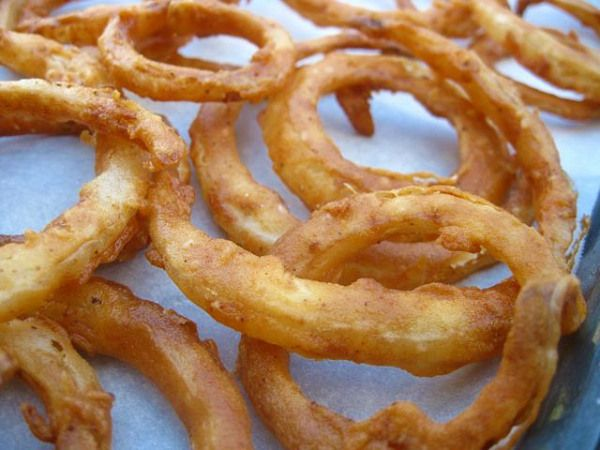

1/1 [==============================] - 3s 3s/step
Buttermilk onion rings.jpg
Result = onion rings
Calorie = 349.01
Fat = 21.505
Carbohydrate = 37.23
Protein = 3.315


In [12]:
from google.colab import files
#from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
from IPython.display import Image, display

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = tf.expand_dims(x, axis=0)/255.
  display(Image(filename=path))
  classes = load_train_model.predict(x, batch_size=128).argmax(axis=1)
  classes = classes[0]
  cal, fat, carb, protein = caloriesvalue(classes)
  print(path)
  print(f"Result = {test_file_name[classes]}")
  print(f"Calorie = {cal}")
  print(f"Fat = {fat}")
  print(f"Carbohydrate = {carb}")
  print(f"Protein = {protein}")